# Employee Satisfaction analysis of a company
#### Dataset - HR_comma_sep ( kaggle.com )

In [1]:
# Importing packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
#xgboost is powerfull library for machine learning 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import plot_tree

import pickle

In [2]:
# Loading dataset into a dataframe

df0 = pd.read_csv("HR_comma_sep.csv")


# Display first 10 rows of the dataframe

df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# general information about the dataframe
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In the above cell we have found that there is no null values in any columns present in the dataframe

Therefore the dataframe is clean with no null values

There 14999 entries/rows in df

In [4]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
#describing the dataframe
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


calculating the statistic information of the dataframe

In [6]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

some column names are in capital starting letters and some are not, I will make it consistent 

In [7]:
df0 = df0.rename(columns={'Work_accident':'work_accident',
                         'Department':'department',
                         'time_spend_company':'tenure',
                         'average_montly_hours':'average_monthly_hours'})

In [8]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

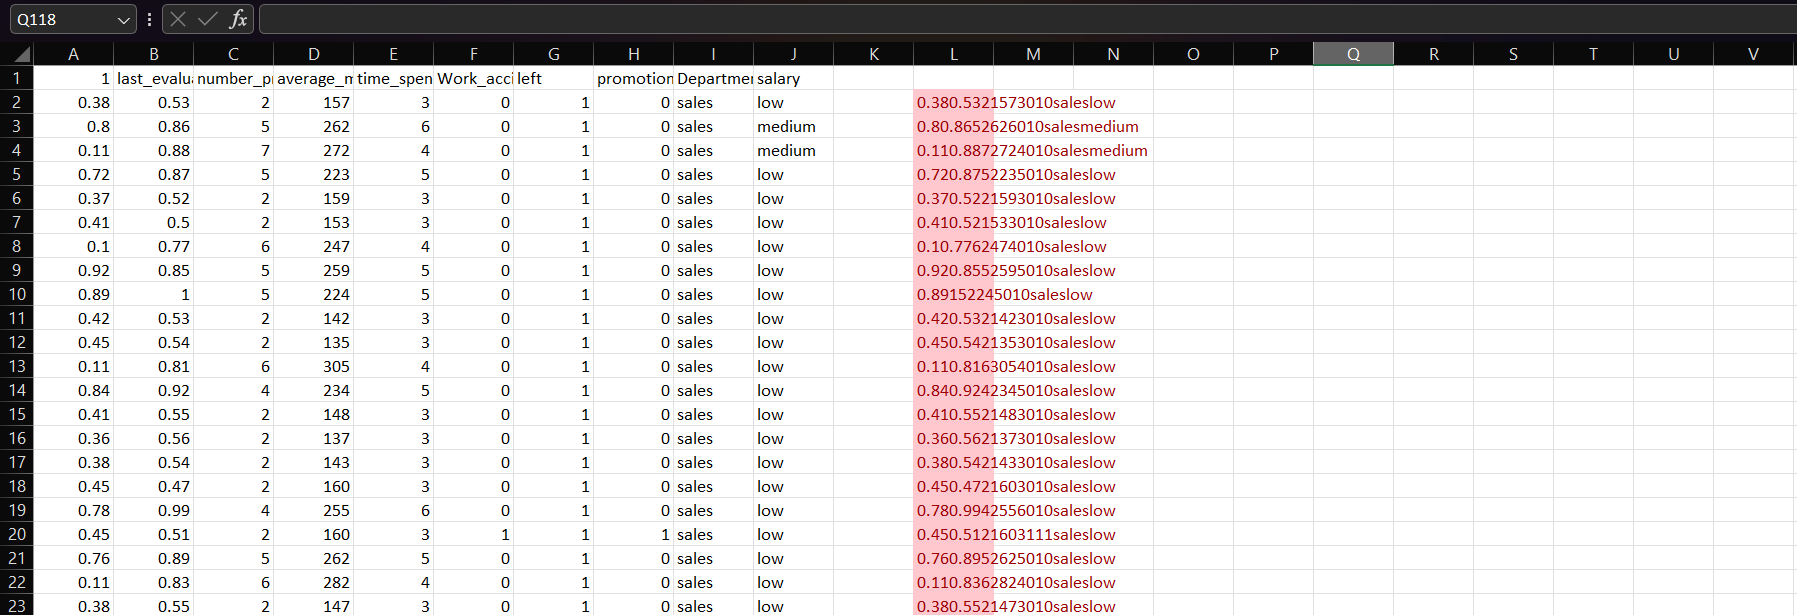

Here you can see there are lot of duplicate rows present in the dataframe

So we need to remove these duplicates

In [9]:
#number of duplicates in the df
df0.duplicated().sum()

3008

In [10]:
df0.shape

(14999, 10)

In [11]:
df1 = df0.drop_duplicates(keep='first')
#so here it will keep the first occurence of the duplicate and remove the rest of the same dupicates found
#this is stored in df1

In [12]:
df1.shape

(11991, 10)

In [13]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df1.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high
11999,0.50,0.73,4,180,3,0,0,0,IT,low


#### Outliers in the dataset
We need to remove the outliers based on the classification algorithm we are going to use.

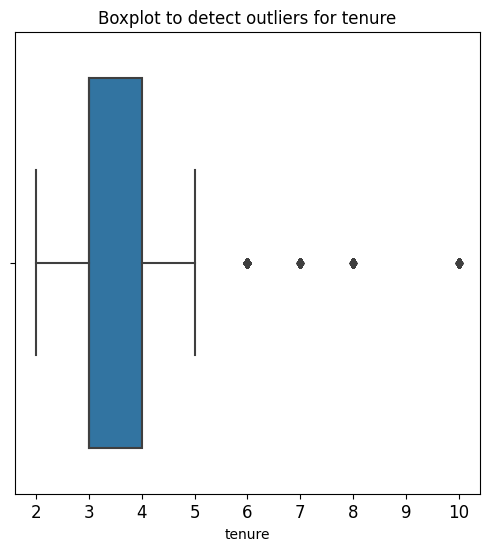

In [15]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [16]:
percentile25 = df1['tenure'].quantile(0.25)

percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25  # iqr = 75p - 25p , ll = 75p+iqr*1.5, up = 25p - iqr*1.5
upper_limit = percentile75+iqr*1.5
lower_limit = percentile25-iqr*1.5

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


outliers = df1[(df1['tenure']>upper_limit) | (df1['tenure']<lower_limit)] 

print("Number of rows in the data containing outliers in `tenure`:", len(outliers)) #number of outliers

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


#### here the outliers are 'True outliers' as they represent natural variations in the dataset and can be used to gain better insigts from the data. So here these outliers are left as it is.

## Analysing the data

In [17]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

so, 1991 employees left the company according to the data

In [18]:
df1.shape

(11991, 10)

In [19]:
print(df1['left'].value_counts(normalize=True)*100) #percentage calculation of employee who left

0    83.39588
1    16.60412
Name: left, dtype: float64


83% percentage of emp are staying and 16% are leaving

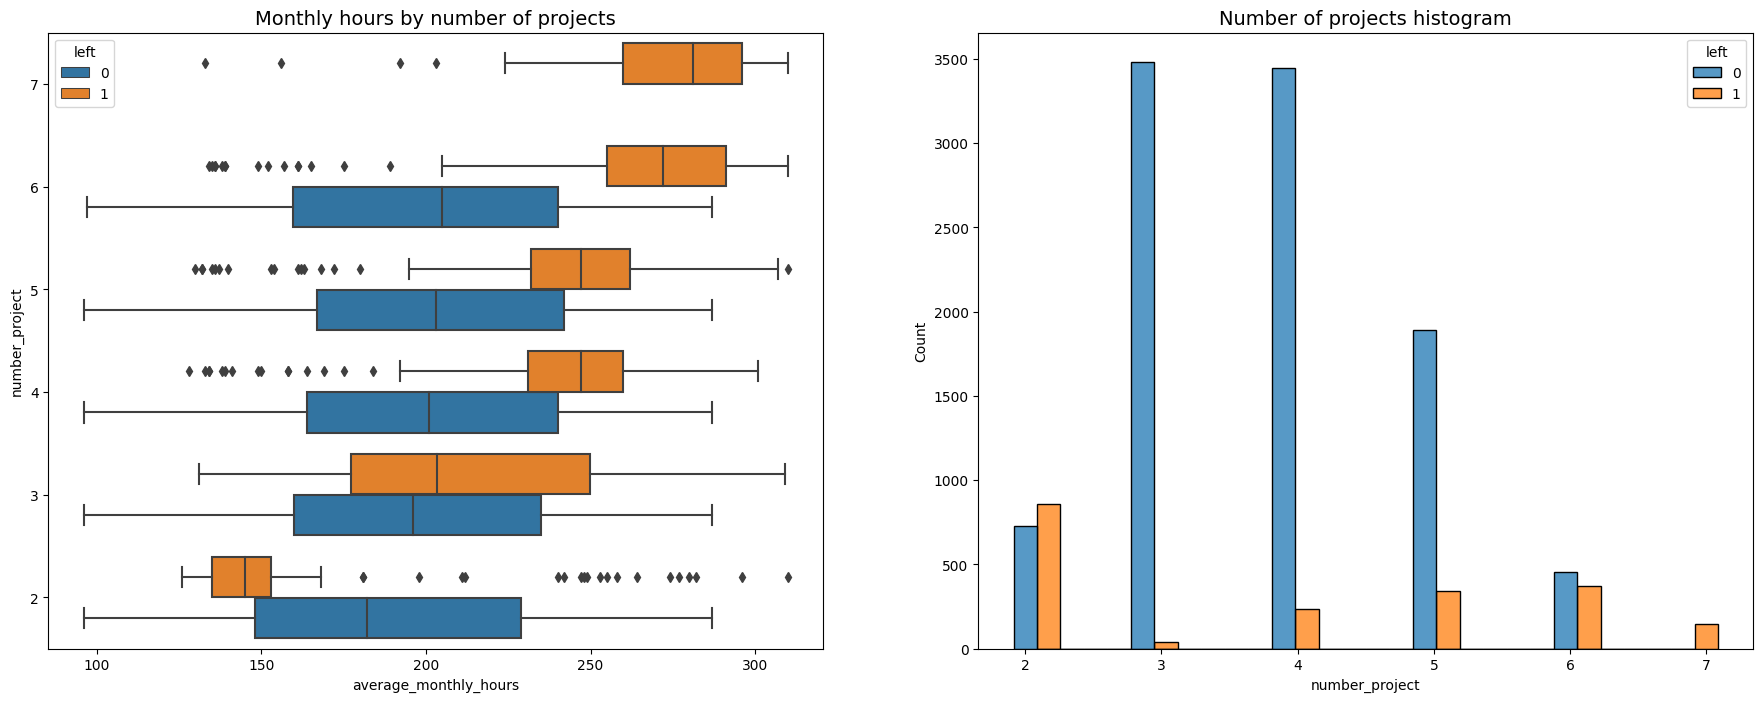

In [75]:
# visualization to find relationships btw variables in data

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creating boxplot to show 
#`average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Created histogram showing
#distribution of `number_project`, comparing employees who stayed versus those who left

tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')


plt.show()

There are many observations you could make from this plot.

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

In [21]:
# Geting values of employee counts of stayed/left with 7 projects
# and satisfaction level less than 50%

df1[(df1['number_project']==7)&(df1['satisfaction_level']<0.50)]['left'].value_counts()

1    142
Name: left, dtype: int64

everyone who worked on 7 projects have left the job, this can be possible due to low salary or no-promotions which might have resulted in lower satisfaction level

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

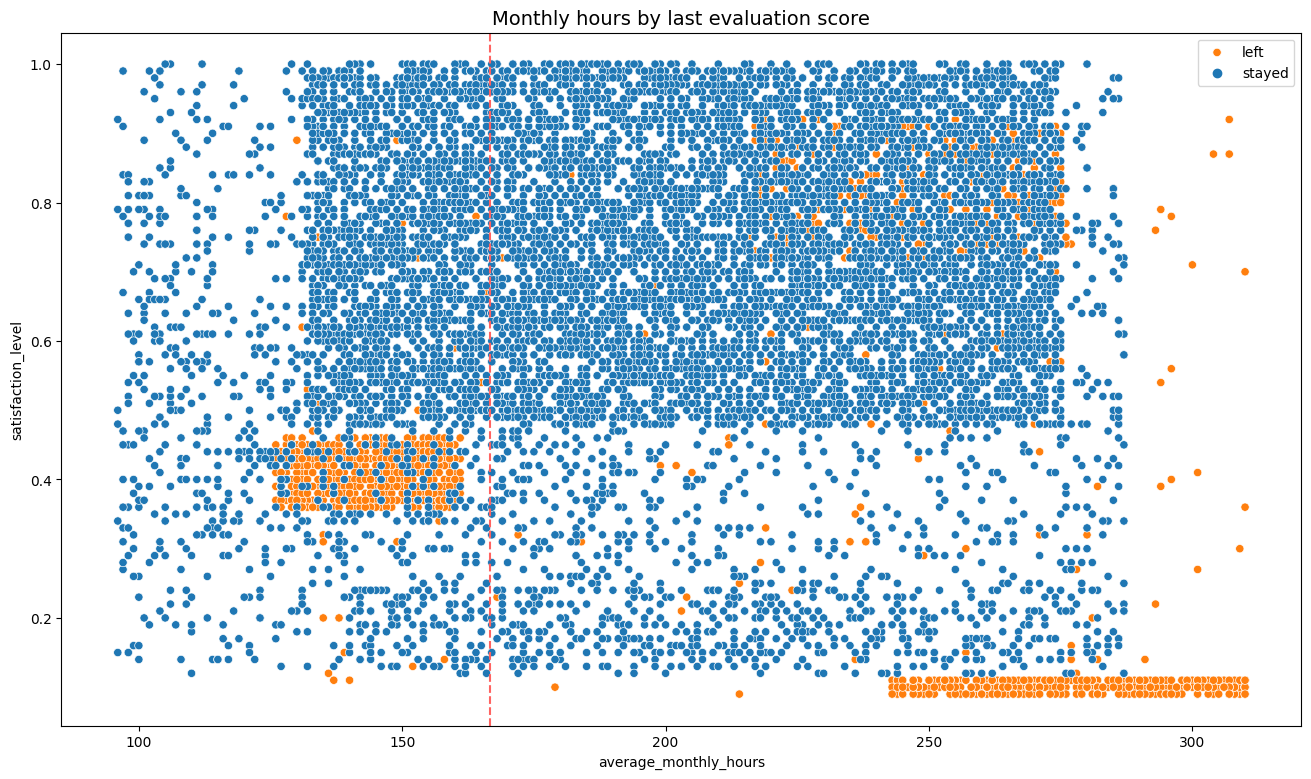

In [79]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left')
plt.axvline(x=166.67,color='#ff6361',ls='--')
plt.legend(['left','stayed'])
plt.title('Monthly hours by last evaluation score',fontsize=14)

notobaly there are three parts in the graph
From the above graph we can see employees working more than 240 hours per month leave the company.
which is 75 hours per week.

also 130 - 160 hours per week but low satisfaction level left the company
and 140 - 270 hours per week who have good satisfaction level and and stayed in company

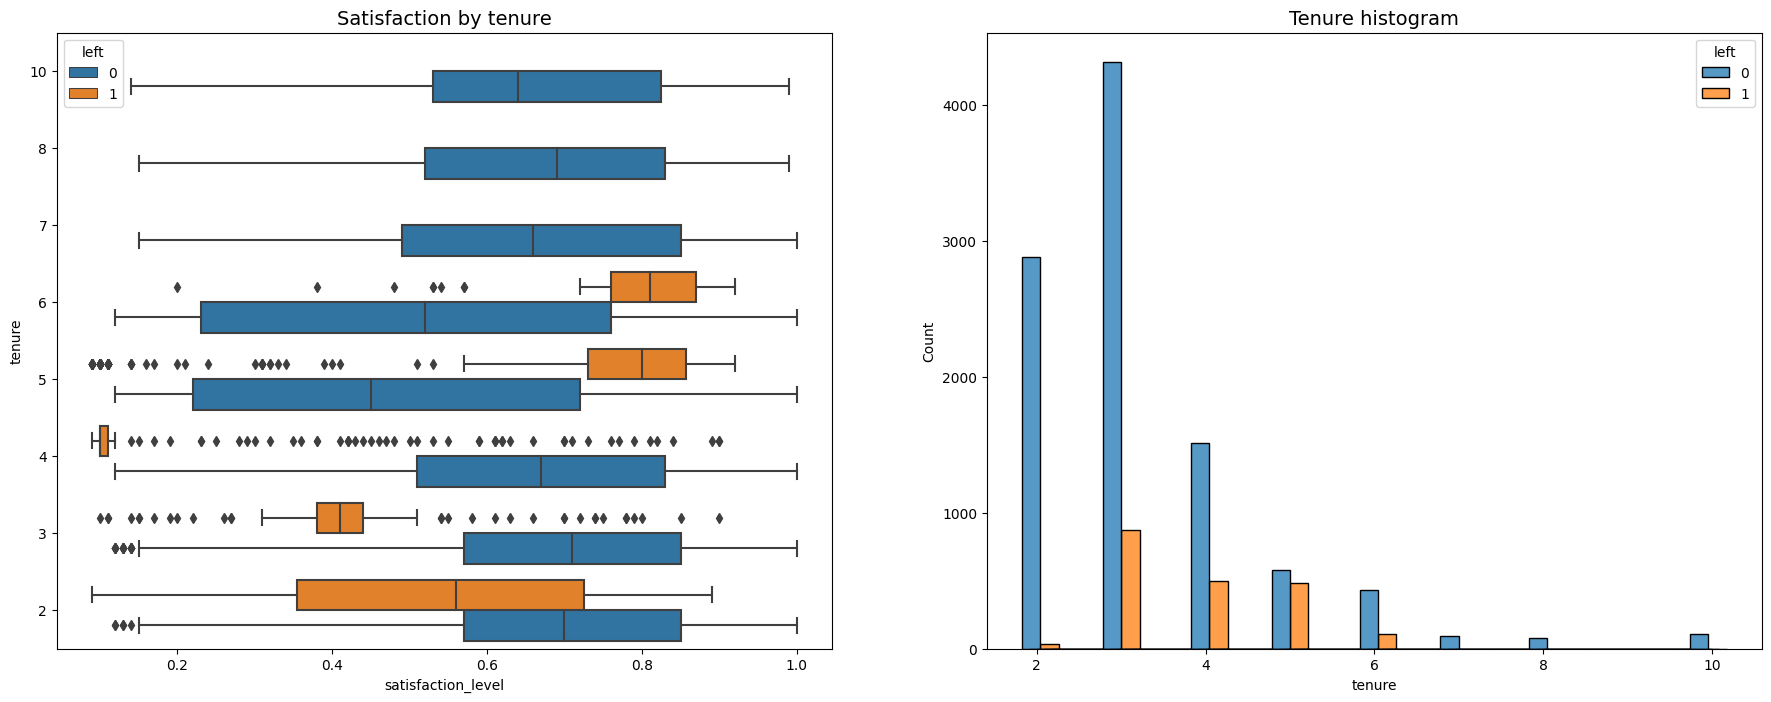

In [44]:
fig,ax = plt.subplots(1,2,figsize=(22,8))
sns.boxplot(data=df1,x='satisfaction_level',y='tenure',hue='left',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1,x='tenure',hue='left',multiple='dodge',ax=ax[1],shrink=5)
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [45]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

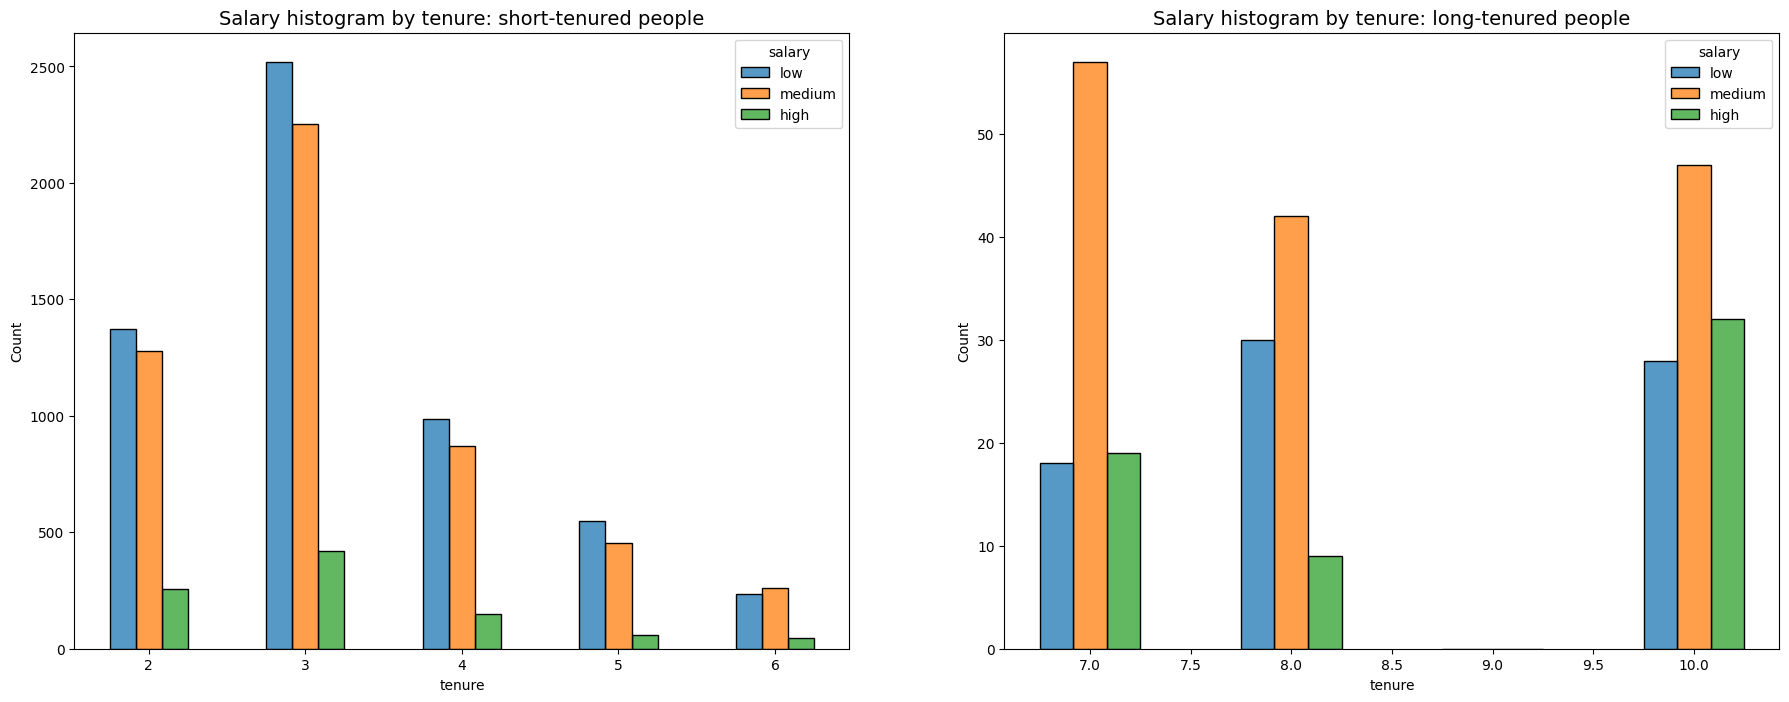

In [81]:
fig,ax = plt.subplots(1,2,figsize=(22,8))


tenure_short = df1[df1['tenure']<7] #short term employee


tenure_long = df1[df1['tenure']>6] #long term eployees

sns.histplot(data=tenure_short,x='tenure',hue='salary',discrete=1,
            hue_order=['low','medium','high'],multiple='dodge',shrink=0.5,ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=tenure_long,x='tenure',hue='salary',discrete=1,
            hue_order=['low','medium','high'],multiple='dodge',shrink=0.5,ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

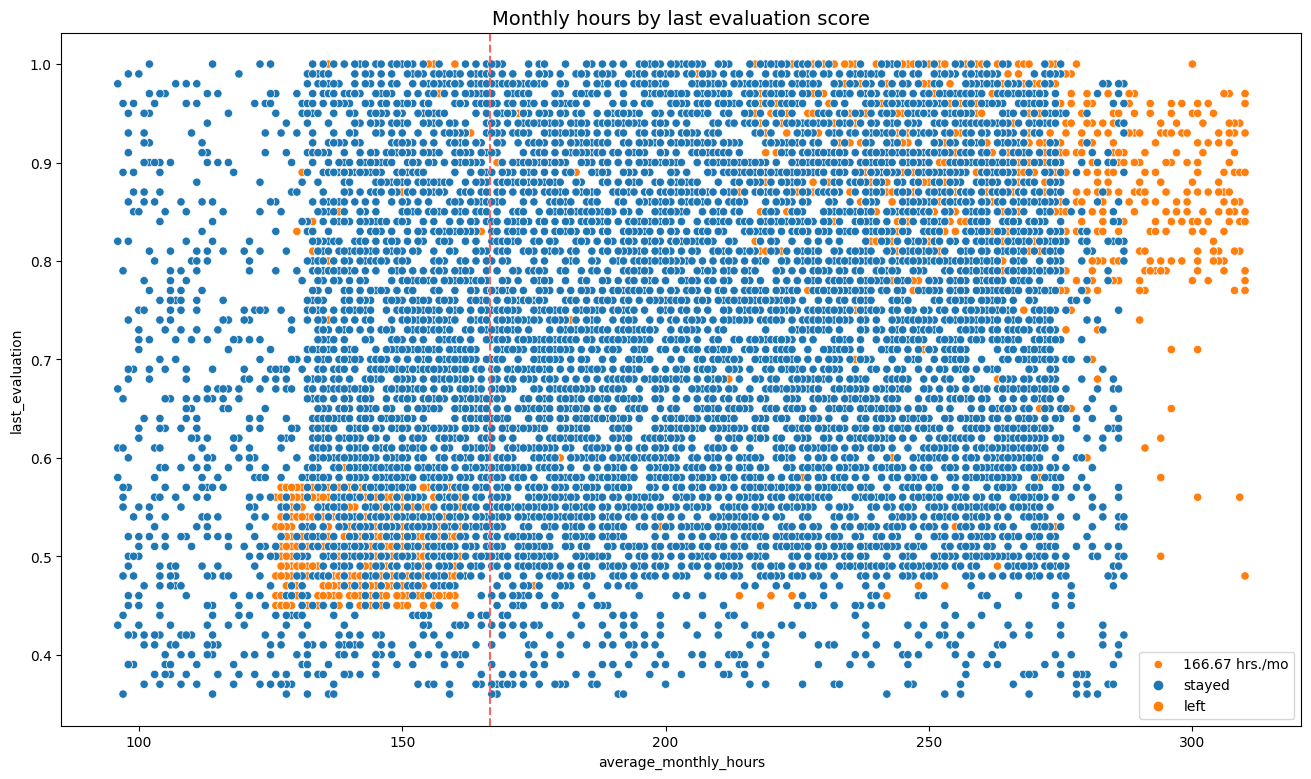

In [48]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='last_evaluation',hue='left')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo','stayed','left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');
plt.show()

two sections in the graph

overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.

There seems to be a correlation between hours worked and evaluation score.

There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

Most of the employees in this company work well over 167 hours per month.

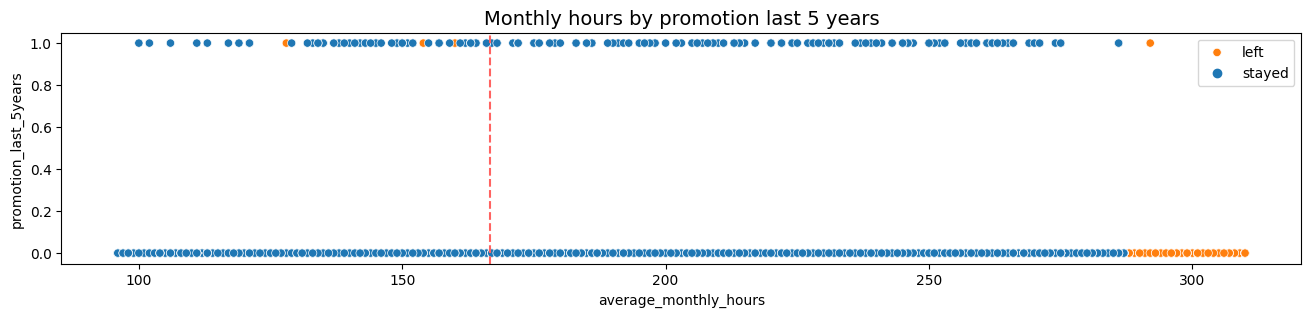

In [82]:
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1,x='average_monthly_hours',y='promotion_last_5years',hue='left')
plt.axvline(x=166.67,color='#ff6361',ls='--')
plt.legend(labels=['left','stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

This plot shows whether employees worked long hours were promoted or not.

So here we can see. people who were promoted did not leave the company eventhough they worked for longer hours than their peers.

But very few people were promoted who worked for longest hours. And they left the company without any promotion.

In [93]:
output = []
for it in df1['department']:
    if it not in output:
        output.append(it)
output

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

list of different departments present

Employees who left are distributed across departments, so we can analyse people who left from each department ---> 

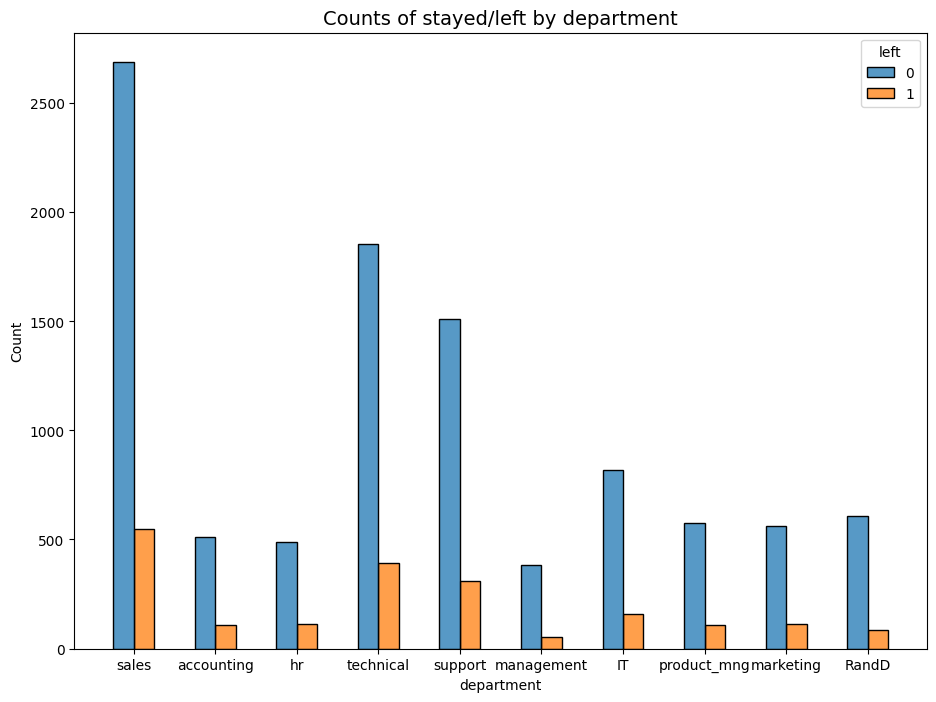

In [94]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1,x='department',hue='left',discrete=1,hue_order=[0,1],shrink=0.5,multiple='dodge')
plt.title('Counts of stayed/left by department', fontsize=14);

C:\Users\Roshan\AppData\Local\Temp\ipykernel_24264\325706065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("vlag", as_cmap=True))


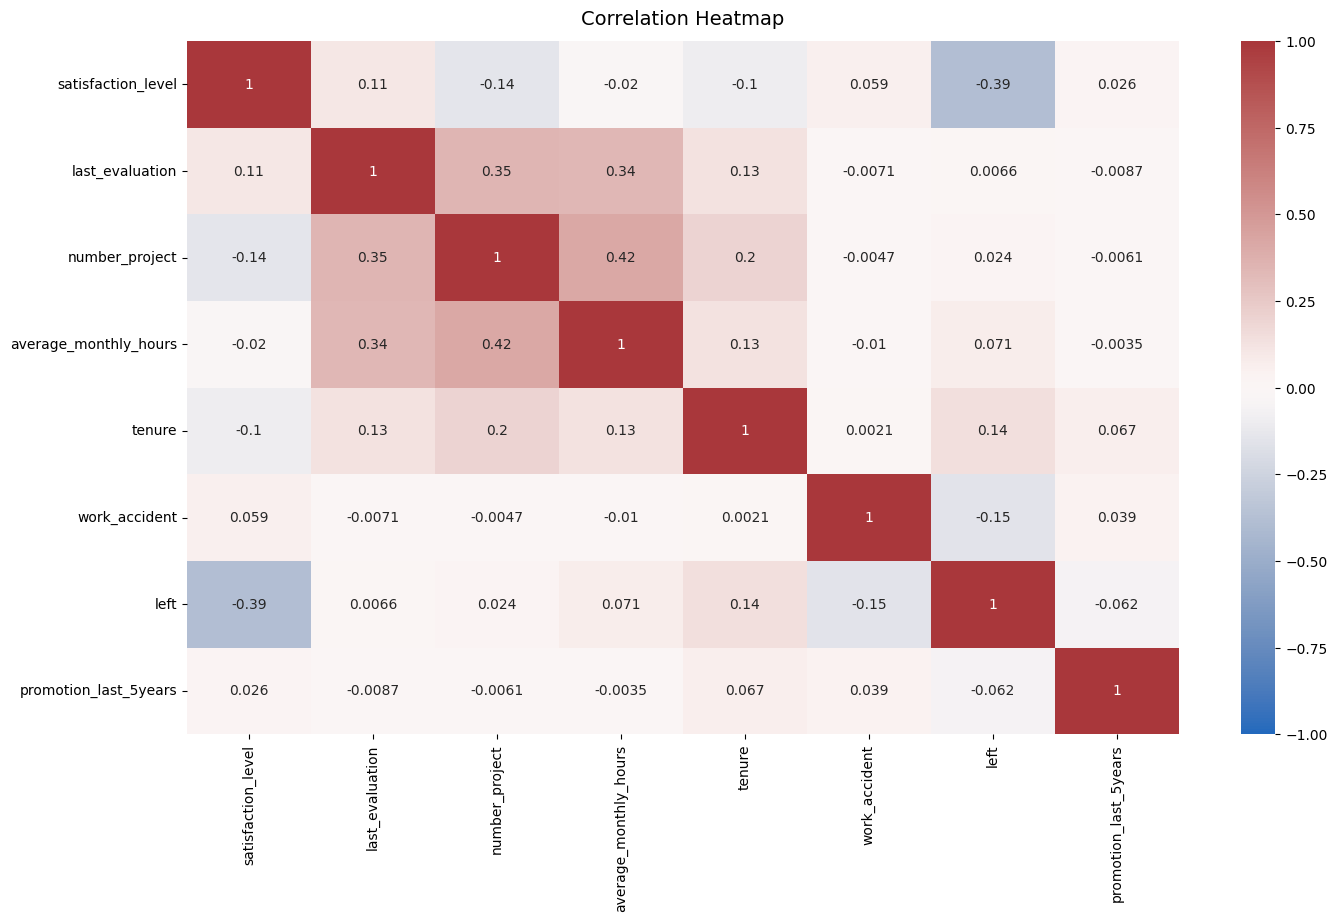

In [54]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Last_evaluation, number_project, average_monthly_hours are positvely correlated
and left, satisfaction level are negatively correlated

#### Gained Insights from the data

it appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

## model building - logistic regression

In [55]:
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category')
                   .cat.set_categories(['low','medium','high'])
                   .cat.codes)
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc,drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### logistic regression is 
outcome variable categorical
observation are independent of each other
no severe multicollinearity among x variables
no extreme outliers
linear relationshop btw each x variable and logic of the outcome variable
suffciently large sample size

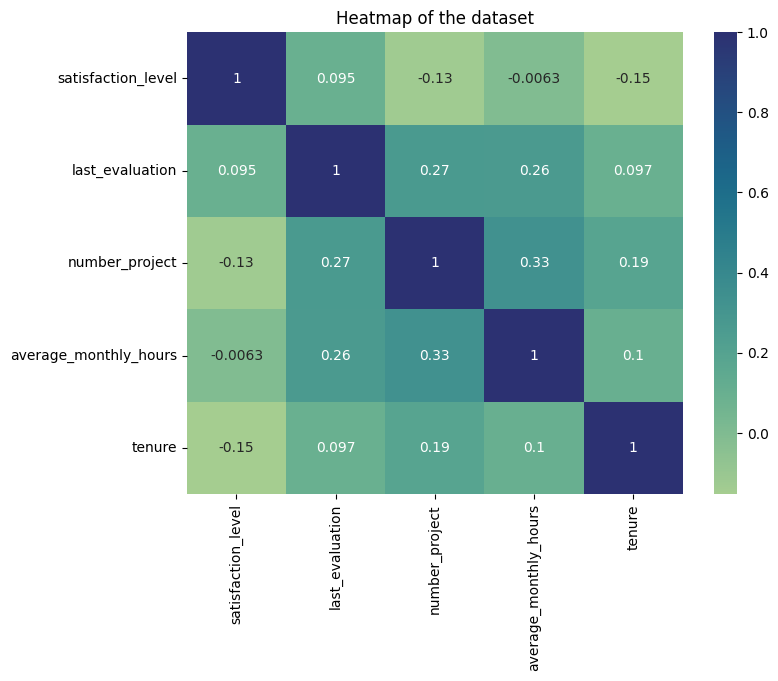

In [95]:
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']]
           .corr(),annot=True,cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

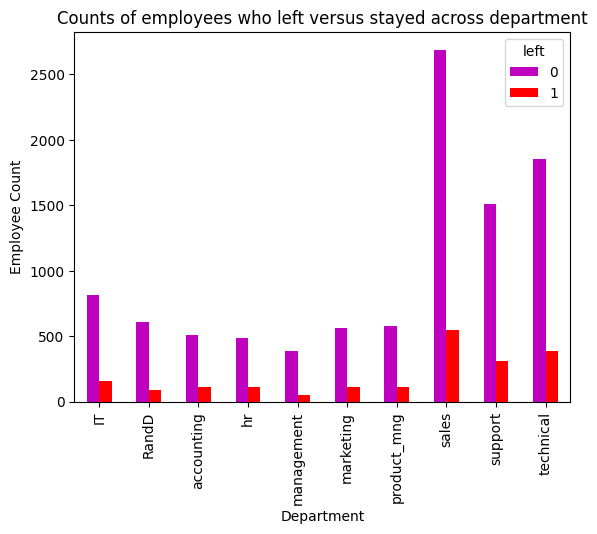

In [96]:
pd.crosstab(df1['department'],df1['left']).plot(kind='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

#### Now its time to remove the outliers
as logistic regression is sensitive to the outliers we need to remove them

as here the outliers are from the tenure variable

In [97]:
df_logreg = df_enc[(df_enc['tenure']>=lower_limit)&(df_enc['tenure']<=upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [99]:
df_enc.shape

(11991, 19)

In [98]:
df_logreg.shape
#reduced data frame

(11167, 19)

In [100]:
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [101]:
X = df_logreg.drop('left',axis=1)
X.head()
#left coloumns has removed from the data frame

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
#training set and testing set 0.75 - 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#constructing logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42,max_iter=500).fit(X_train,y_train)

In [103]:
y_pred = log_clf.predict(X_test)

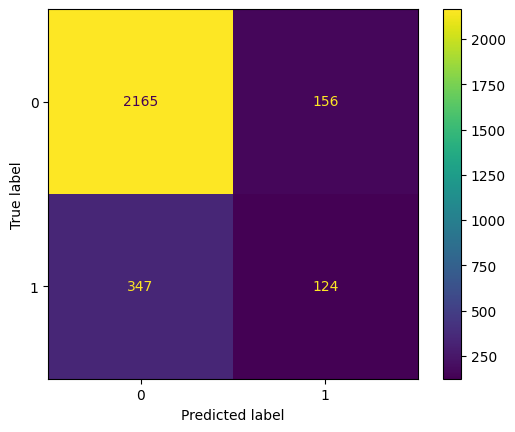

In [104]:
log_cm  = confusion_matrix(y_test,y_pred,labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [65]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [66]:
target_names = ['predicted would not leave','Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.